
Entrega #2 - Regressão linear

@author: Leonardo Pezenatto da Silva
@email: leonardo.pezenatto@posgrad.ufsc.br
@date: May 26, 2023

--------------------------------REGRESSÃO LINEAR--------------------------------


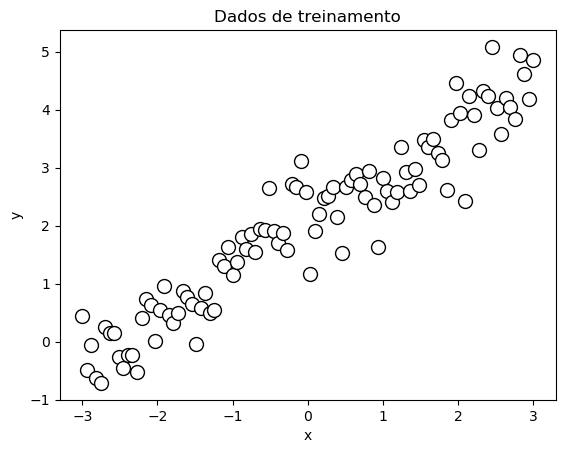

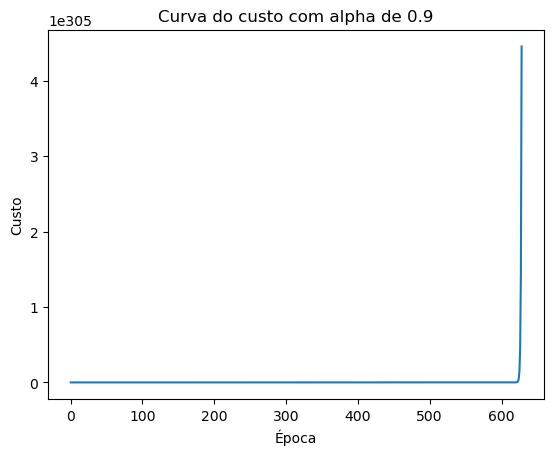

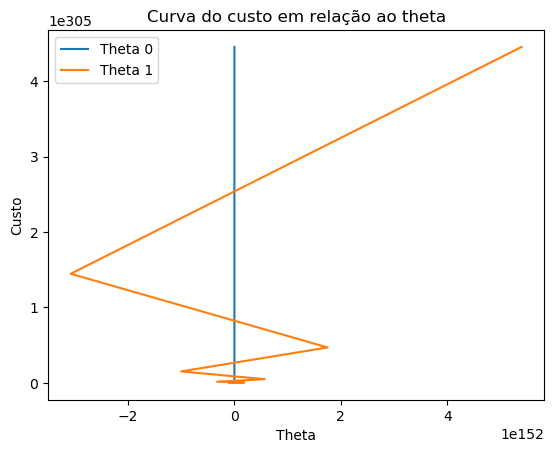

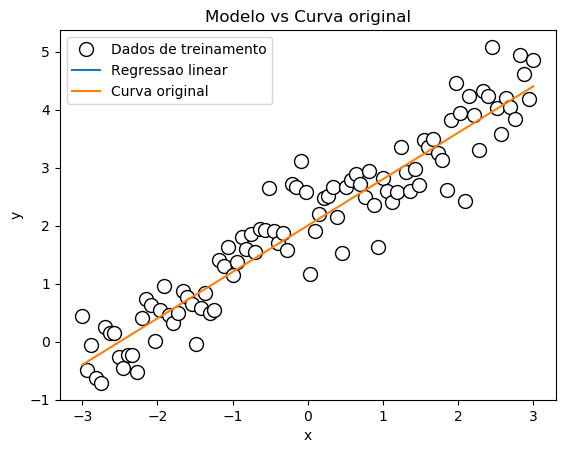

Número de iterações: 5000
Taxa de aprendizado: 0.9
Theta final: [nan nan]
Custo final: nan
Hipótese: nan + nan * x
Função original: 2 + 0.8 * x
O gradiente divergiu!


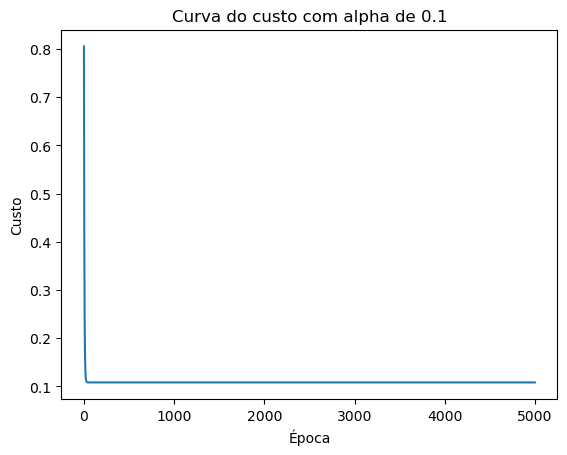

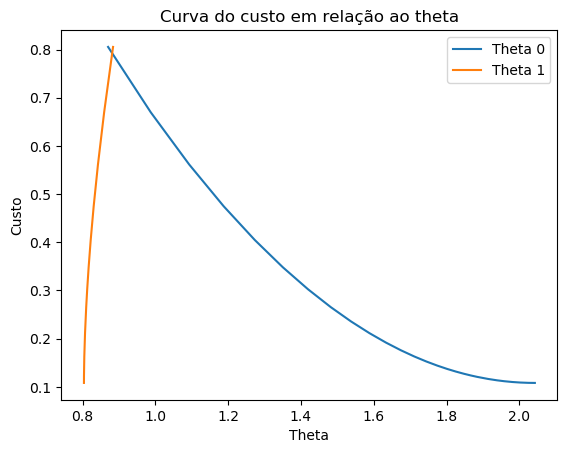

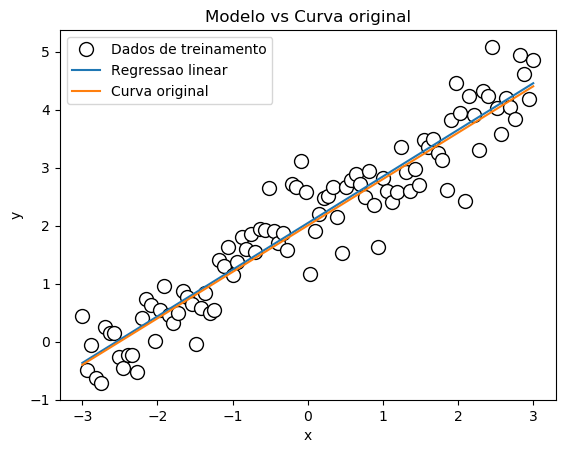

Número de iterações: 5000
Taxa de aprendizado: 0.1
Theta final: [2.04258913 0.80360728]
Custo final: 0.10814224038592382
Hipótese: 2.0425891331906487 + 0.8036072818138956 * x
Função original: 2 + 0.8 * x


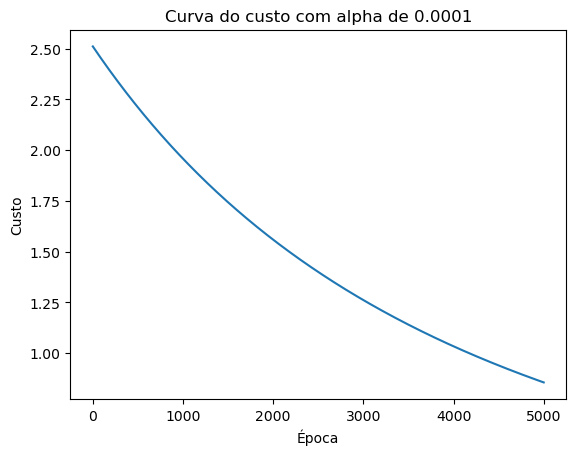

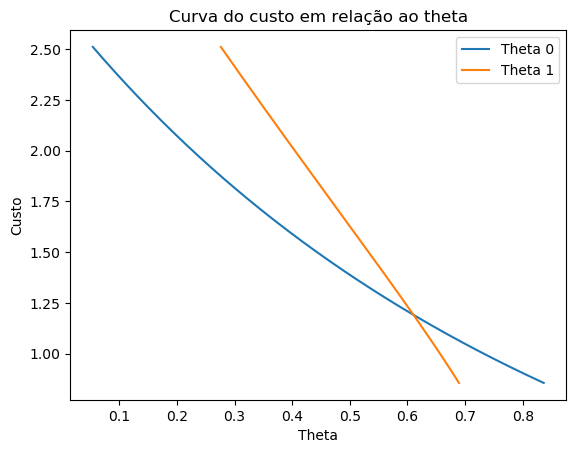

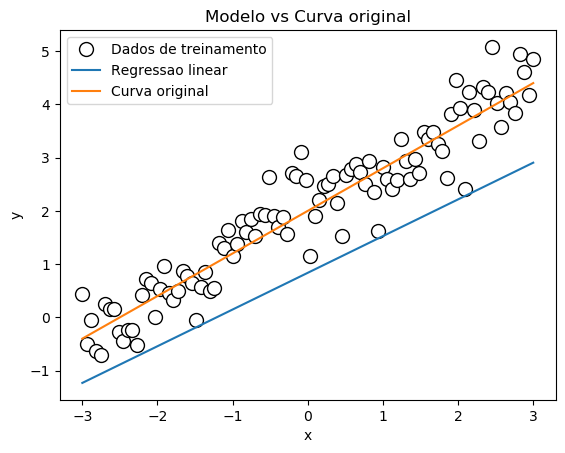

Número de iterações: 5000
Taxa de aprendizado: 0.0001
Theta final: [0.83646472 0.68945807]
Custo final: 0.855450201654712
Hipótese: 0.8364647220818155 + 0.6894580696525303 * x
Função original: 2 + 0.8 * x













-----------------------------FIM - REGRESSÃO LINEAR-----------------------------
------------------------------REGRESSÃO POLINOMIAL------------------------------


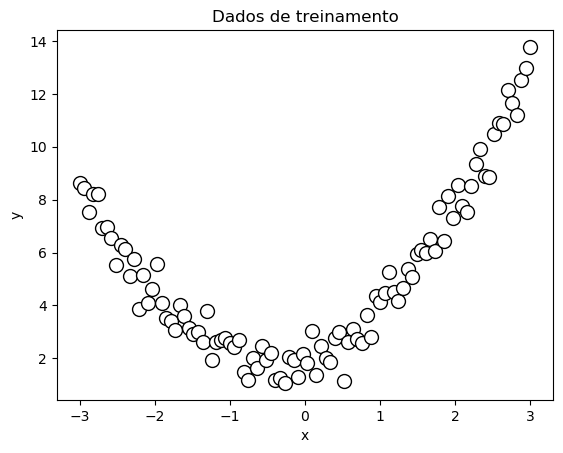

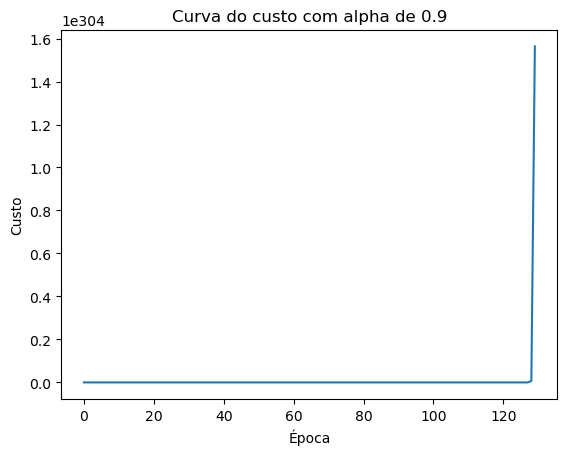

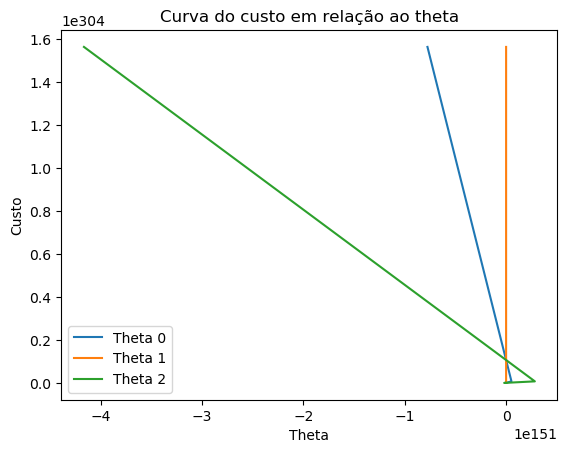

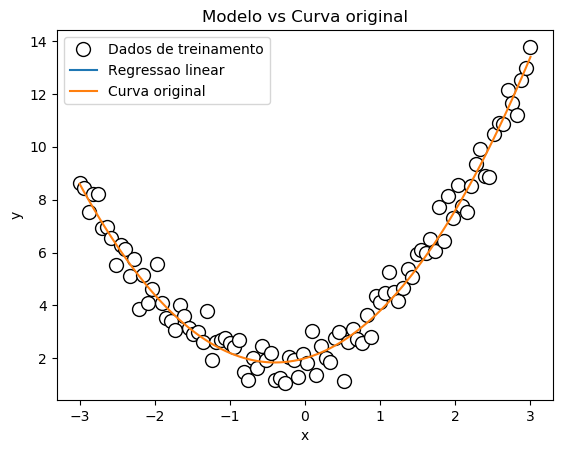

Número de iterações: 5000
Taxa de aprendizado: 0.9
Theta final: [nan nan nan]
Custo final: nan
Hipótese: nan + nan * x + nan * x²
Função original: 2 + 0.8 * x + x²
O gradiente divergiu!


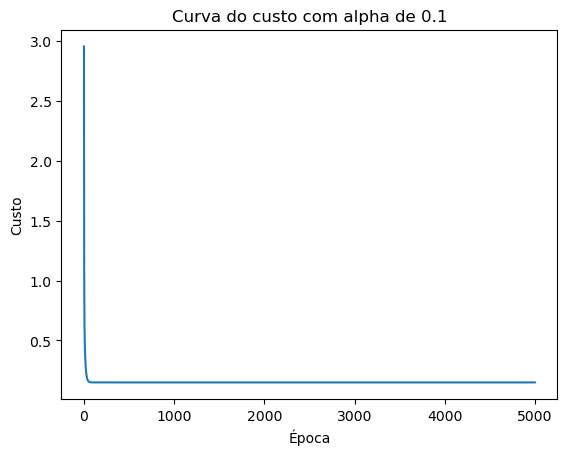

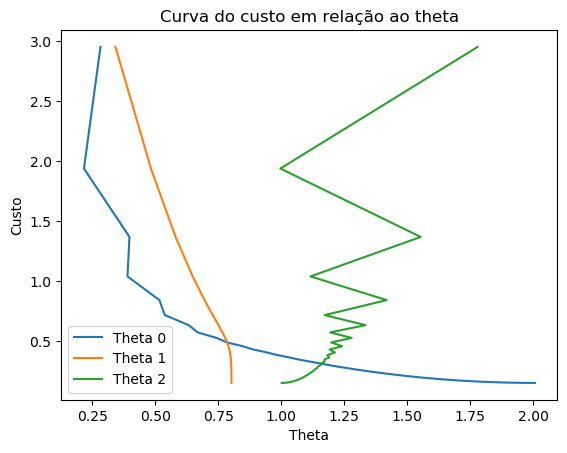

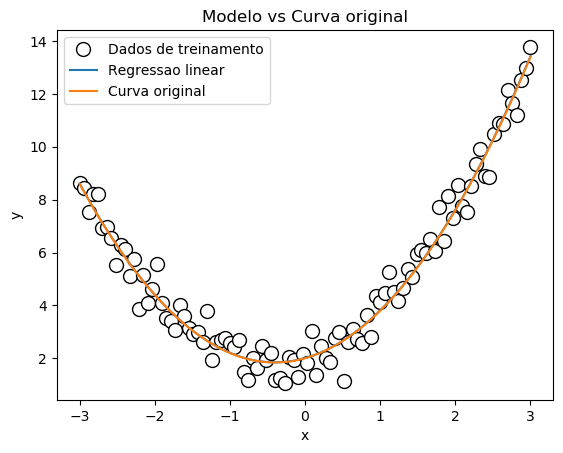

Número de iterações: 5000
Taxa de aprendizado: 0.1
Theta final: [2.0064529  0.80164376 1.00139195]
Custo final: 0.14944141136033187
Hipótese: 2.0064528953549923 + 0.8016437620203738 * x + 1.0013919489953182 * x²
Função original: 2 + 0.8 * x + x²


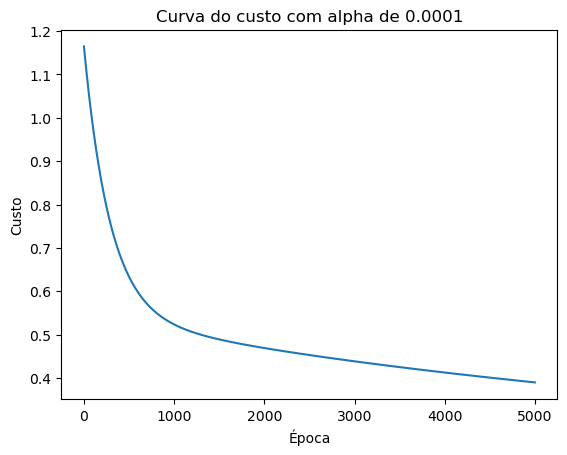

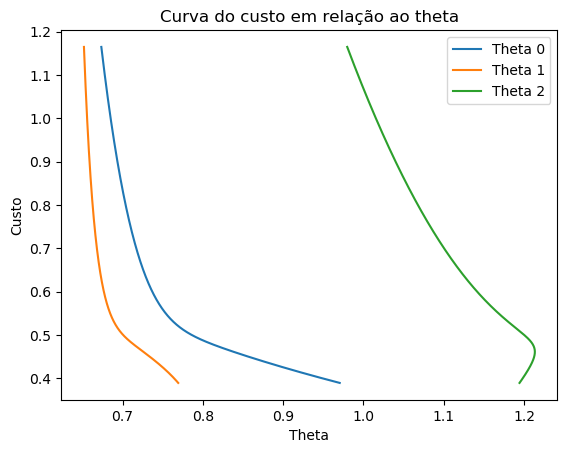

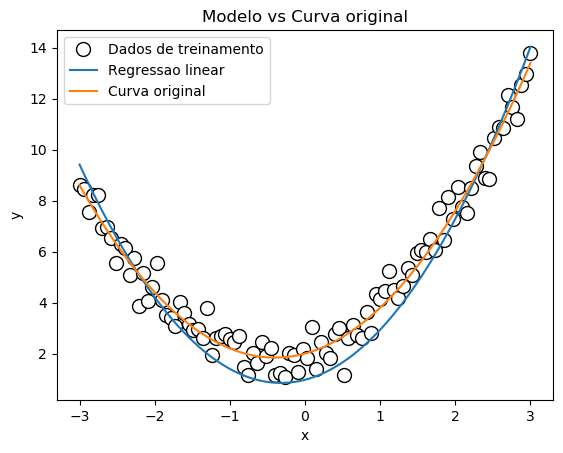

No handles with labels found to put in legend.


Número de iterações: 5000
Taxa de aprendizado: 0.0001
Theta final: [0.97038453 0.76919741 1.19435917]
Custo final: 0.3897548876863948
Hipótese: 0.9703845291714387 + 0.7691974094586369 * x + 1.194359173688351 * x²
Função original: 2 + 0.8 * x + x²













---------------------------FIM - REGRESSÃO POLINOMIAL---------------------------
---------------------------REGRESSÃO LINEAR MÚLTIPLA----------------------------


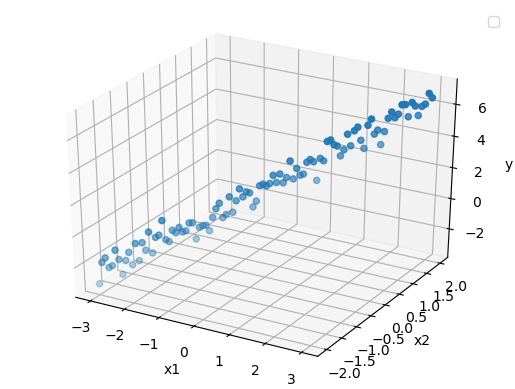

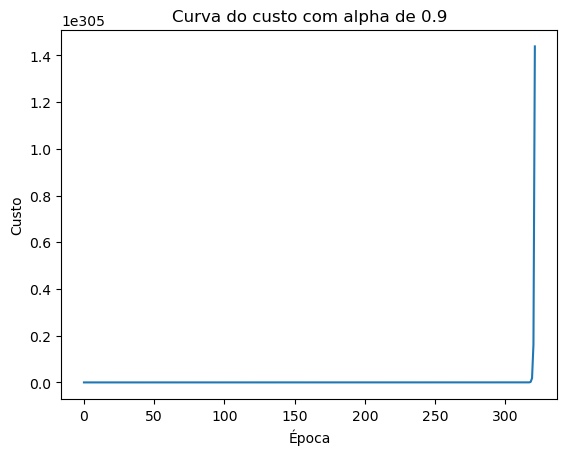

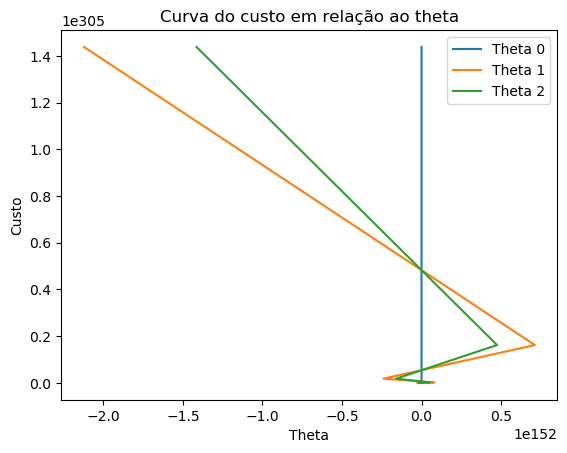

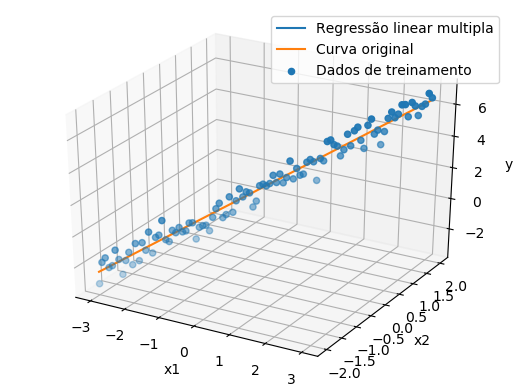

Número de iterações: 5000
Taxa de aprendizado: 0.9
Theta final: [nan nan nan]
Custo final: nan
Hipótese: nan + nan * x + nan * x(2)
Função original: 2 + 0.8 * x + x(2)
O gradiente divergiu!


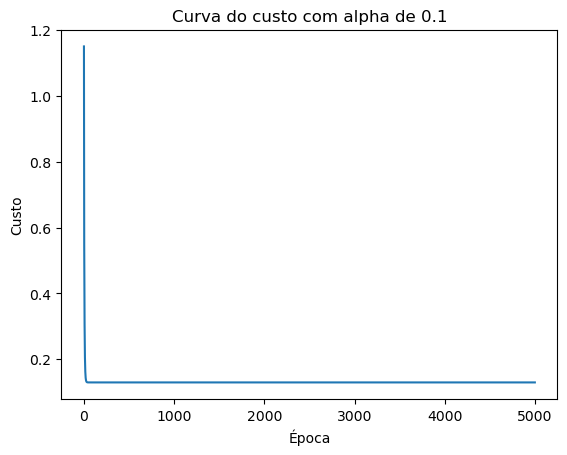

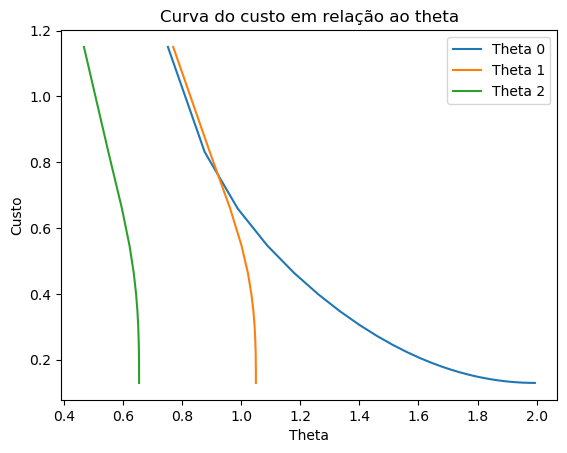

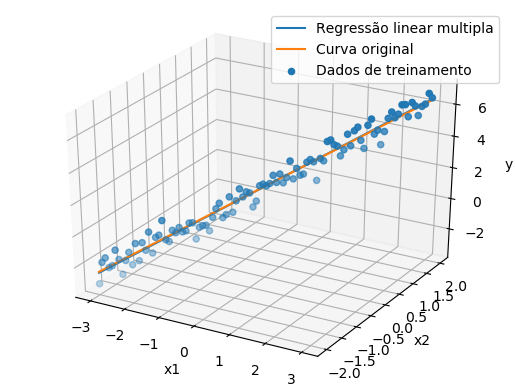

Número de iterações: 5000
Taxa de aprendizado: 0.1
Theta final: [1.99372221 1.04993972 0.65477378]
Custo final: 0.12970199136097987
Hipótese: 1.993722209162281 + 1.04993971852138 * x + 0.6547737776887513 * x(2)
Função original: 2 + 0.8 * x + x(2)


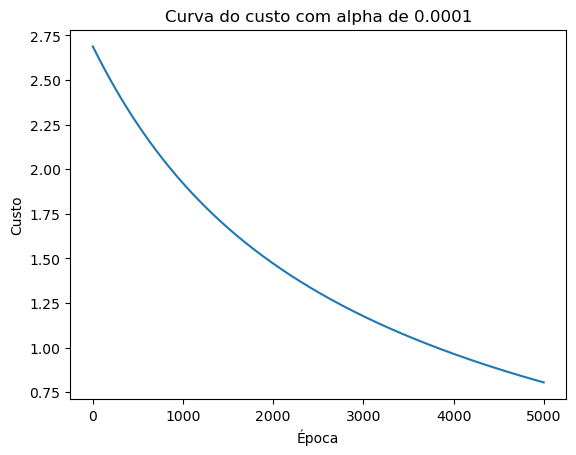

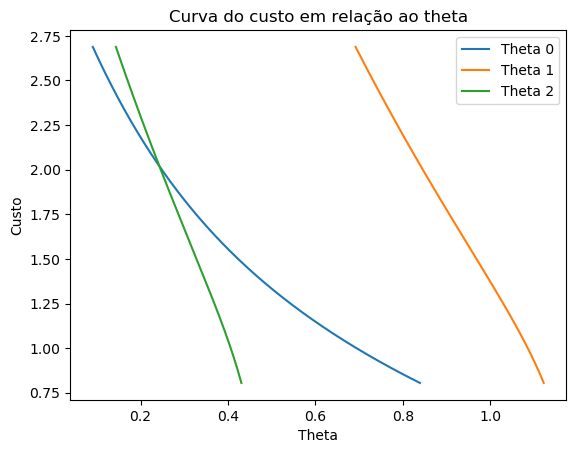

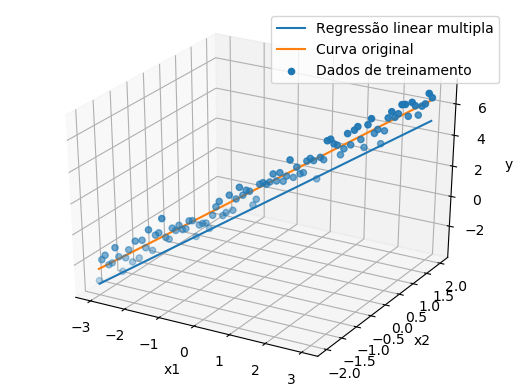

Número de iterações: 5000
Taxa de aprendizado: 0.0001
Theta final: [0.8393109  1.12278501 0.43058019]
Custo final: 0.8050178826982005
Hipótese: 0.8393108989140242 + 1.122785009476183 * x + 0.43058018830601835 * x(2)
Função original: 2 + 0.8 * x + x(2)













------------------------FIM - REGRESSÃO LINEAR MÚLTIPLA-------------------------


In [1]:
#!/usr/bin/env python

"""
Entrega #2 - Regressão linear

@author: Leonardo Pezenatto da Silva
@email: leonardo.pezenatto@posgrad.ufsc.br
@date: May 26, 2023
"""
print(__doc__) # print do cabeçalho

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.seterr(all='ignore') # usado para ignorar o warning de overflow quando o gradiente diverge

# Funcao linear
def f_true ( x ) :
    return 2 + 0.8 * x

# Funcao multivariavel
def multi_f_true ( x ) :
    return 2 + 0.8 * x[0] + x[1]

# Funcao polinomial
def polynomial_f_true ( x ) :
    return 2 + 0.8 * x + x**2

# conjunto de dados {(x,y)}
def generate_data():
    if f_true == multi_f_true: # se a reta original é multivariavel gera-se x1 e x2
        x1 = np . linspace ( -3 , 3 , 100)
        x2 = np . linspace ( -2 , 2 , 100)
        xs = np.stack([x1, x2], axis=1)
        ys = np . array ( [ f_true ( x ) + np . random . randn () *0.5 for x in xs ] )
        xs = np.stack([x1, x2], axis=0)
    else:
        xs = np . linspace ( -3 , 3 , 100)
        ys = np . array ( [ f_true ( x ) + np . random . randn () *0.5 for x in xs ] )
    return xs, ys
 
#hipotese
def h (x , theta ) :
    hipoteses = np.matmul(x, theta)
    return hipoteses

# funcao de custo
def J ( theta , xs , ys ) :
    m = ys.size
    custo = (1/(2*m))*np.sum(np.square(h(xs,theta)-ys))
    return custo

# derivada parcial com respeito a theta [i]
def gradient (i , alpha, theta , xs , ys ) :
    m = ys.size
    recorded_cost = []
    recorded_theta = []
    for _ in range(i):
        theta = theta - (alpha/m)*np.dot(xs.T, np.dot(xs,theta) - ys)
        recorded_cost.append(J(theta, xs, ys))
        recorded_theta.append(theta)
    return theta, recorded_cost, recorded_theta

"""
plota no mesmo grafico : - o modelo / hipotese ( reta )
 - a reta original ( true function )
 - e os dados com ruido (xs , ys)
"""
def print_modelo ( theta , xs , ys ) :
    plt.title("Modelo vs Curva original")
    plt.plot(xs[:, 1], ys, 'wo', ms=10, mec='k')
    plt.plot(xs[:, 1], np.dot(xs, theta), '-')
    plt.plot(xs[:, 1], f_true(xs[:, 1]), '-')
    plt.legend(['Dados de treinamento', 'Regressao linear', 'Curva original'])
    plt.ylabel('y')
    plt.xlabel('x')
    plt.show()

# plota os dados de entrada
def plot_data(x, y):
    plt.title("Dados de treinamento")
    plt.plot(x, y, 'wo', ms=10, mec='k')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.show()

"""
plota no mesmo grafico 3D: - o modelo / hipotese ( reta )
 - a reta original ( true function )
 - e os dados com ruido (xs , ys)
"""
def print_3d_modelo(theta, xs, ys):
    xs_copy = np.stack([xs[:,1],xs[:,2]], axis=0)
    ax = plt.axes(projection='3d')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.scatter3D(xs[:,1], xs[:,2], ys, label="Dados de treinamento")
    ax.plot3D(xs[:,1],xs[:,2], np.dot(xs,theta), label="Regressão linear multipla")
    ax.plot3D(xs[:,1],xs[:,2], f_true(xs_copy), label="Curva original")
    ax.legend()
    plt.show()

# plota os dados de entrada em um grafico 3D
def plot_3d_data(xs, ys):
    ax = plt.axes(projection='3d')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.scatter(xs[0], xs[1], ys)
    ax.legend()
    plt.show()

# plota os custos em cada época
def plot_cost(i, recorded_cost, alpha):
    plt.title("Curva do custo com alpha de " + str(alpha))
    epochs = np.arange(0,i)
    plt.plot(epochs, recorded_cost, '-')
    plt.ylabel('Custo')
    plt.xlabel('Época')
    plt.show()

# plota os recorded_cost em relação aos thetas
def plot_cost_thetas(recorded_cost, recorded_theta):
    plt.title("Curva do custo em relação ao theta")
    plt.plot(recorded_theta, recorded_cost, '-')
    plt.legend(['Theta 0', 'Theta 1', 'Theta 2'])
    plt.ylabel('Custo')
    plt.xlabel('Theta')
    plt.show()

# regressao linear
def linear_regression(i, alpha, x, y):
    m = y.size # numero de dados de treinamento
    x = np.stack([np.ones(m), x], axis=1) # coloca uma coluna de 1's
    theta = np.random.uniform(0,1,2) # gera os thetas aleatoriamente entre 0 e 1
    theta, recorded_cost, recorded_theta = gradient(i, alpha, theta, x, y) # aplica o gradiente descendente 
    plot_cost(i, recorded_cost, alpha) 
    plot_cost_thetas(recorded_cost, recorded_theta)
    print_modelo(theta, x, y)
    print("Número de iterações: " + str(i))
    print("Taxa de aprendizado: " + str(alpha))
    print("Theta final: " + str(theta))
    print("Custo final: " + str(recorded_cost[i-1]))
    print("Hipótese: " + str(theta[0]) + " + " + str(theta[1]) + " * x")
    print("Função original: 2 + 0.8 * x")
    if np.isnan(theta).any():
        print("O gradiente divergiu!")

# regressao linear multipla
def multiple_linear_regression(i, alpha, x, y):
    m = y.size # numero de dados de treinamento
    x = np.stack([np.ones(m), x[0], x[1]], axis=1) # coloca uma coluna de 1's
    theta = np.random.uniform(0,1,3) # gera os thetas aleatoriamente entre 0 e 1
    theta, recorded_cost, recorded_theta = gradient(i, alpha, theta, x, y) # aplica o gradiente descendente 
    plot_cost(i, recorded_cost, alpha)
    plot_cost_thetas(recorded_cost, recorded_theta)
    print_3d_modelo(theta, x, y)
    print("Número de iterações: " + str(i))
    print("Taxa de aprendizado: " + str(alpha))
    print("Theta final: " + str(theta))
    print("Custo final: " + str(recorded_cost[i-1]))
    print("Hipótese: " + str(theta[0]) + " + " + str(theta[1]) + " * x + " + str(theta[2]) + " * x(2)")
    print("Função original: 2 + 0.8 * x + x(2)")
    if np.isnan(theta).any():
        print("O gradiente divergiu!")

# regressao polinomial
def polinomial_regression(i, alpha, x, y, degree):
    m = y.size # numero de dados de treinamento
    x = np.stack([np.ones(m), x], axis=1) # coloca uma coluna de 1's
    x_copy = np.delete(x.copy(), 0, 1)
    for d in range(2, degree+1): # redefine as variaveis conforme grau do polinomio
        x = np.append(x,np.power(x_copy,d), axis=1) 
    theta = np.random.uniform(0,1,d+1) # gera os thetas aleatoriamente entre 0 e 1
    theta, recorded_cost, recorded_theta = gradient(i, alpha, theta, x, y) # aplica o gradiente descendente 
    plot_cost(i, recorded_cost, alpha)
    plot_cost_thetas(recorded_cost, recorded_theta)
    print_modelo(theta, x, y)
    print("Número de iterações: " + str(i))
    print("Taxa de aprendizado: " + str(alpha))
    print("Theta final: " + str(theta))
    print("Custo final: " + str(recorded_cost[i-1]))
    print("Hipótese: " + str(theta[0]) + " + " + str(theta[1]) + " * x + " + str(theta[2]) + " * x²")
    print("Função original: 2 + 0.8 * x + x²")
    if np.isnan(theta).any():
        print("O gradiente divergiu!")
    

# realiza o treinamento da regressao selecionada
def regression(x, y, i, alphas, type, degree=1):
    if type == "normal":
        print("REGRESSÃO LINEAR".center(80,"-"))
        plot_data(x,y)
        for alpha in alphas: # aplica a regressao linear para cada taxa de aprendizagem inserida
            linear_regression(i, alpha, x, y) # aplica a regressao linear
        print('\n' * 12)
        print("FIM - REGRESSÃO LINEAR".center(80,"-"))
    elif type == "multi":
        print("REGRESSÃO LINEAR MÚLTIPLA".center(80,"-"))
        plot_3d_data(xs, ys)
        for alpha in alphas: # aplica a regressao linear multipla para cada taxa de aprendizagem inserida
            multiple_linear_regression(i, alpha, x, y) # aplica a regressao linear multipla
        print('\n' * 12)
        print("FIM - REGRESSÃO LINEAR MÚLTIPLA".center(80,"-"))
    elif type == "polynomial":
        print("REGRESSÃO POLINOMIAL".center(80,"-"))
        plot_data(x,y)
        for alpha in alphas: # aplica a regressao polinomial para cada taxa de aprendizagem inserida
            polinomial_regression(i, alpha, x, y, degree) # aplica a regressao polinomial
        print('\n' * 12)
        print("FIM - REGRESSÃO POLINOMIAL".center(80,"-"))
    else:
        print("Invalid choice!")


xs,ys = generate_data() # gera os dados de entrada
regression(xs, ys, 5000, [0.9, 0.1, 0.0001], "normal") # aplica a regressao linear

f_true = polynomial_f_true # define a reta original como polinomial
xs,ys = generate_data() # gera os dados de entrada
regression(xs, ys, 5000, [0.9, 0.1, 0.0001], "polynomial", 2) # aplica a regressao polinomial

f_true = multi_f_true # define a reta original como multivariavel
xs,ys = generate_data() # gera os dados de entrada
regression(xs, ys, 5000, [0.9, 0.1, 0.0001], "multi") # aplica a regressao linear multipla